In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

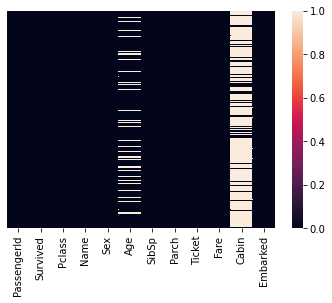

In [4]:
sns.heatmap(train.isnull(), yticklabels=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

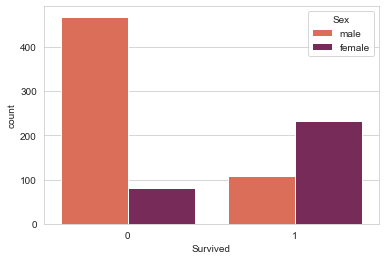

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue= 'Sex' ,data = train, palette= 'rocket_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

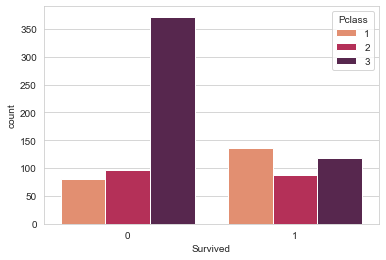

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Pclass',data= train, palette = 'rocket_r')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

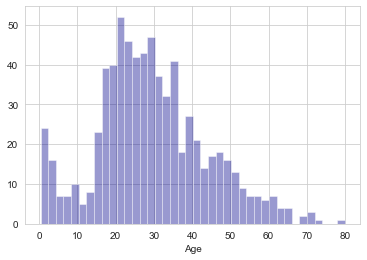

In [7]:
sns.distplot(train['Age'].dropna(),kde= False,color ='darkblue',bins =40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

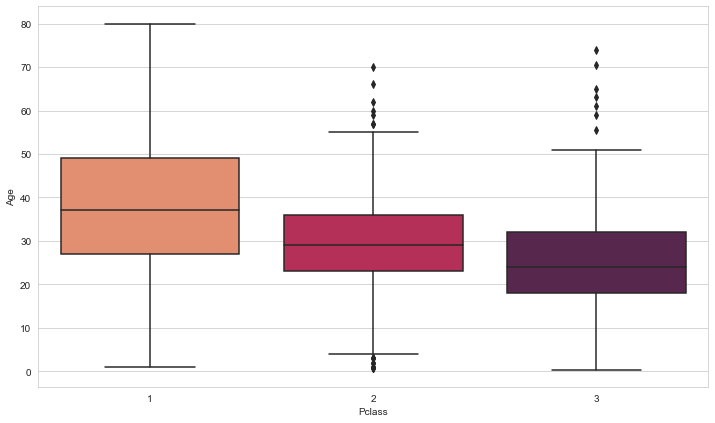

In [8]:
%matplotlib inline
plt.figure(figsize=(12,7))
sns.boxplot(x= 'Pclass',y='Age',data = train,palette='rocket_r')

In [9]:
def insert_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
train['Age']= train[['Age', 'Pclass']].apply(insert_age, axis=1)

<AxesSubplot:>

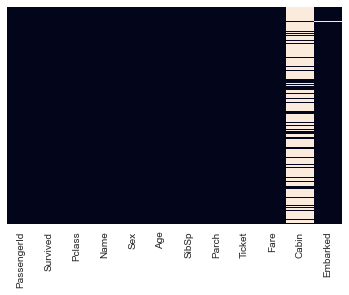

In [11]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False)

In [12]:
train.drop('Cabin', axis=1, inplace = True)

In [13]:
new_train= train.fillna('S')

<AxesSubplot:>

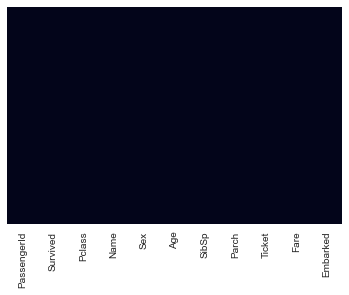

In [14]:
sns.heatmap(new_train.isnull(), yticklabels=False, cbar = False)

In [15]:
pd.get_dummies(new_train['Embarked'],drop_first= True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [16]:
sex = pd.get_dummies(new_train['Sex'], drop_first= True)
embark = pd.get_dummies(new_train['Embarked'],drop_first= True)

In [17]:
new_train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [18]:
new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [19]:
new_train= pd.concat([new_train, sex, embark], axis=1)

In [20]:
new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
new_train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [22]:
new_train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train,y_test= train_test_split(new_train.drop('Survived', axis=1),new_train['Survived'],
                                                  test_size=0.30,
                                                  random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
loreg= LogisticRegression()

In [27]:
loreg.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predict = loreg.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
co_accuracy = confusion_matrix(y_test,predict)
co_accuracy

array([[133,  21],
       [ 41,  73]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy = accuracy_score(y_test,predict)
accuracy

0.7686567164179104